# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%ls "/content/drive/My Drive/ppk/images"

classed/  raw/


In [3]:
%cd /content

/content


In [4]:
%ls /content

drive/  sample_data/


In [ ]:
%cp -r "/content/drive/My Drive/ppk/." /content/

# Get dependencies

In [ ]:
!pip install -U tf-nightly

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf

from sklearn.model_selection import train_test_split

import cv2
from tqdm import tqdm


import matplotlib.pyplot as plt

import datetime

import os 
import glob

tqdm.pandas()

In [10]:
tf.random.set_seed(1234)

# Get Labels

In [11]:
labels = pd.read_csv('train.csv')

In [12]:
display(labels.head())
labels.info()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [13]:

# image to array function 
def load_image(image_id):
    image = cv2.imread(image_id)
    return np.float64(image)


def create_paths(img):
    return 'images/{}.jpg'.format(img)


labels['path'] = labels.image_id.progress_apply(create_paths)

100%|██████████| 1821/1821 [00:00<00:00, 315860.70it/s]


In [14]:
X = labels.loc[:,'path']
y = labels.loc[:, labels.columns[1:5]]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=13,
                                                    stratify=y,
                                                    test_size=0.3)

In [15]:

labels.drop(columns='image_id', inplace=True)
labels = labels[['path', 'healthy','multiple_diseases','rust','scab']]

In [16]:

labels.head()

,path,healthy,multiple_diseases,rust,scab
0,images/Train_0.jpg,0,0,0,1
1,images/Train_1.jpg,0,1,0,0
2,images/Train_2.jpg,1,0,0,0
3,images/Train_3.jpg,0,0,1,0
4,images/Train_4.jpg,1,0,0,0


# Device initialization

## TPU

In [23]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.105.110.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.105.110.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


InvalidArgumentError: ignored

In [ ]:
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

## GPU

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

# Unused Functions

In [23]:


# # zippedtrain = zip(X_train,y_train)
# # zippedtest = zip(X_test,y_test)
# # train_df = pd.DataFrame({'path':X_train,'class':[list(i) for i in y_train]})
# # test_df = pd.DataFrame({'path':X_test,'class':[list(i) for i in y_test]})

# train_df = pd.DataFrame(X_train).join(pd.DataFrame(y_train))
# test_df = pd.DataFrame(X_test).join(pd.DataFrame(y_test))

# train_df.head()

In [24]:
# fit_x = train_df.path.progress_apply(load_image).values

# blue_means, green_means, red_means = get_channel_means(train_df.path.values)
# blue_mean = (sum(blue_means) / len(blue_means)) * 1./255
# green_mean = (sum(green_means) / len(green_means)) * 1./255
# red_mean = (sum(red_means) / len(red_means)) * 1./255

In [25]:
# means = [red_mean, green_mean, blue_mean]
# means = [0.4043033271154857, 0.4043033271154857, 0.3131933874018047]
# means
# red_mean, green_mean, blue_mean = 0.4043033271154857, 0.4043033271154857, 0.3131933874018047
# red_mean = 0.4043033271154857
# green_mean  = 0.4043033271154857
# blue_mean = 0.3131933874018047

In [26]:

# print(blue_mean)
# print(green_mean)
# print(red_mean)
# def channel_norm(img, label=None):
#     # img = np.array(img)
#     # img[:,:,0] -= blue_mean * (1./255)
#     # img[:,:,1] -= green_mean * (1./255)
#     # img[:,:,2] -= red_mean * (1./255)
#     img = tf.image.per_image_standardization(img)
#     if label is None:
#         return img
#     else:
# #       return img, label

# def random_blurr(img, label=None):
#   with tf.device('/device:GPU:0'):
#     go = np.random.randint(0,10)
#     if go > 6:
# #         num = np.random.randint(10,30)
# #         kernel = np.ones((num,num),'float')*( 1.0 / (num*num) )
# #         img = cv2.filter2D(img,-1,kernel)
#         num = np.random.randint(5,12)
#         img = cv2.blur(img, (num,num))
#     if label is None:
#         return img
#     else:
#         return img, label
   


# img = random_blurr(cv2.imread(train_df.path[1800]))
# plt.imshow(img)
# print(img)

In [27]:
 
# def decode_image(filename, label=None, image_size=(256, 256)):
#   with tf.device('/device:GPU:0'):
#     bits = tf.io.read_file(filename)
#     image = tf.image.decode_jpeg(bits, channels=3)
#     image = tf.cast(image, tf.float64)
#     # image = image / 255.0
#     image = np.array(img).astype('float64')
#     image[:,:,2] -= blue_mean 
#     image[:,:,1] -= green_mean 
#     image[:,:,0] -= red_mean 
#     image = tf.cast(image, tf.float32)
#     # image = image - means
    
#     image = tf.image.resize(image, image_size)
#     if label is None:
#         return image
#     else:
#         return image, label


# def data_augment(image, label=None):
#   with tf.device('/device:GPU:0'):
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     # num = np.random.randint(1,10)
#     # image = tf.cast(image, tf.uint8)
#     # image = cv2.blur(src=image, ksize=(num,num))
#     image = tf.image.random_brightness(image,max_delta=0.2)
#     # image = tf.image.random_saturation(image,lower=5, upper=10)
#     image = tf.image.random_hue(image, max_delta=0.2)
#     # image = tf.image.per_image_standardization(image)
#     if label is None:
#         return image
#     else:
#         return image, label

In [28]:
# !pip install kaggle_datasets

In [29]:
# # configure TPU from Colab
# from kaggle_datasets import KaggleDatasets
# AUTO = tf.data.experimental.AUTOTUNE
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# strategy = tf.distribute.experimental.TPUStrategy(tpu)

# BATCH_SIZE = 16 * strategy.num_replicas_in_sync
# GCS_DS_PATH = KaggleDatasets().get_gcs_path()

# TensorBoard

In [30]:
# %load_ext tensorboard

In [31]:
# %tensorboard --logdir logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-07-15 23:14:37.076136: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 75, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 290, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 306, in _run_serve_subcommand
    server = self._make_server()
  File "/usr/local/lib/python3

# Channel Normalization

In [32]:

# def get_channel_means(path_list):
#   with tf.device('/device:GPU:0'):
#     blue_means = []
#     green_means = []
#     red_means = []
#     counter = 1
#     for path in path_list:
#         img = load_image(path)
#         blue_mean = img[:,:,0].mean()
#         green_mean = img[:,:,1].mean()
#         red_mean = img[:,:,2].mean()
#         blue_means.append(blue_mean)
#         green_means.append(green_mean)
#         red_means.append(red_mean)
#         if counter % 25 == 0:
#             print('{} images calculated!'.format(counter))
#         counter += 1
#         # means.append([blue_mean, green_mean, red_mean])
#     return blue_means, green_means, red_means 


In [33]:
@tf.function
def chanNorm(image, label):
  means = tf.constant([
      [
          [0.4043033271154857, 0.5134412407909822, 0.3131933874018047]
      ]
  ])

  image = tf.raw_ops.Sub(x=image, y=means);
  
  return image, label

 # BELOW ARE MODELS USING OLDER IMGAGEDATAGEN FLOW

In [34]:
# create an augmented image generator 
# might be better to horizontally crop the images to square then resize down to 512x512
# or add canny edges detection to crop down the final images or something.  very differing background noise 
# some images have hands as background, other have sky, others have ground, others have other plants


# val_image_gen_ = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
#                                                                   featurewise_center=True)
# valGen_ = val_image_gen_.flow_from_dataframe(test_df,
#                                              directory=None, 
#                                              x_col='path',
#                                              y_col=['healthy','multiple_diseases','rust','scab'],
#                                              batch_size=BATCH_SIZE, 
#                                              class_mode='raw', 
#                                              target_size=(imgH,imgW)
#                                              )

# val_image_gen_.mean = [red_mean, green_mean, blue_mean]


# image_generator_ = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
#                                                                     rotation_range=90, 
#                                                                     width_shift_range=0.05,
#                                                                     height_shift_range=0.05, 
#                                                                     horizontal_flip=True, 
#                                                                     vertical_flip=True,
#                                                                     zoom_range=0.05,
#                                                                     featurewise_center=True, 
#                                                                     preprocessing_function=random_blurr)

# traindataGen_ = image_generator_.flow_from_dataframe(train_df, 
#                                                      directory=None, 
#                                                      x_col='path', 
#                                                      y_col=['healthy','multiple_diseases','rust','scab'],
#                                                      target_size=(imgH,imgW), 
#                                                      batch_size=BATCH_SIZE, 
#                                                      class_mode='raw'
#                                                      )

# image_generator_.mean = [red_mean, green_mean, blue_mean]

# image_dataset_from_directory![alt text](https://)

In [35]:
# BATCH_SIZE = 64                                              # GPU
BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync            # TPU

imgH = 256
imgW = 256

VAL_SPLIT = 0.3

In [36]:
## directory is being built in another notebook
directory = "/content/images/classed"

In [37]:
## requires tf_nightly   | can use this to make test_ds just leave label_mode as None

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              directory, 
                                                              labels='inferred', 
                                                              label_mode='categorical', 
                                                              class_names=[class_ for class_ in labels.columns[1:5].values],
                                                              color_mode='rgb', 
                                                              batch_size=BATCH_SIZE, 
                                                              image_size=(imgH, imgW), 
                                                              shuffle=True, 
                                                              seed=1234,
                                                              validation_split=VAL_SPLIT, 
                                                              subset='training', 
                                                              interpolation='bilinear', 
                                                              follow_links=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              directory, 
                                                              labels='inferred', 
                                                              label_mode='categorical', 
                                                              class_names=[class_ for class_ in labels.columns[1:5].values],
                                                              color_mode='rgb', 
                                                              batch_size=BATCH_SIZE, 
                                                              image_size=(imgH, imgW), 
                                                              shuffle=True, 
                                                              seed=1234,
                                                              validation_split=VAL_SPLIT, 
                                                              subset='validation', 
                                                              interpolation='bilinear', 
                                                              follow_links=False
)

Found 1821 files belonging to 4 classes.
Using 1275 files for training.
Found 1821 files belonging to 4 classes.
Using 546 files for validation.


In [38]:
train_ds = train_ds.map(chanNorm, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE).cache()

# .map(random_blurr, num_parallel_calls=tf.data.experimental.AUTOTUNE)


val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE).cache()

# Build Model

In [80]:
def create_model():
  return tf.keras.models.Sequential([
                                     
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),

    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),

    tf.keras.layers.experimental.preprocessing.RandomRotation(0.25),
                                     
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.5, 0.5, 
                                                                 fill_mode='wrap', 
                                                                 interpolation='bilinear', 
                                                                 seed=1234),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3), 
                           activation='relu', 
                           input_shape=(imgH, imgW,3), 
                           padding='valid',
                           data_format='channels_last'),

    tf.keras.layers.Conv2D(32, (3,3), 
                           activation='relu', 
                           padding='valid'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (3,3), 
                           activation='relu', 
                           padding='same'),

    tf.keras.layers.Conv2D(64, (3,3), 
                           activation='relu', 
                           padding='same',
                           dilation_rate=2),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(128, (3,3), 
                           activation='relu', 
                           padding='same'),

    tf.keras.layers.Conv2D(128, (3,3), 
                           activation='relu', 
                           padding='same',
                           dilation_rate=2),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(),

    # Begin NN
    tf.keras.layers.Dense(512, 
                          activation='relu'),

    tf.keras.layers.Dense(4, 
                          activation='softmax')
])


In [81]:
with  strategy.scope():    # tf.device('/device:GPU:0'):
  model = create_model()
  model.build(input_shape=(None, imgH, imgW, 3))
  model.summary()

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy']
                 )


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
random_flip_4 (RandomFlip)   (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
random_translation_4 (Random (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 32)     

In [82]:
EPOCHS = 1000

In [83]:
stop = tf.keras.callbacks.EarlyStopping(patience=25,
                                        monitor='val_loss')

# Train Model

In [84]:
history = model.fit(train_ds, 
                  epochs=EPOCHS,
                  validation_data=val_ds,
                  validation_batch_size=BATCH_SIZE, 
                  shuffle=True, 
                  max_queue_size=10, 
                  workers=2, 
                  use_multiprocessing=True,
                  callbacks=[stop],
                  verbose=1,
                  )

Epoch 1/1000
20/20 [==============================] - 5s 255ms/step - loss: 2.0650 - categorical_accuracy: 0.3310 - val_loss: 1.2694 - val_categorical_accuracy: 0.3407
Epoch 2/1000
20/20 [==============================] - 5s 246ms/step - loss: 1.2582 - categorical_accuracy: 0.3208 - val_loss: 1.2702 - val_categorical_accuracy: 0.3407
Epoch 3/1000
20/20 [==============================] - 5s 246ms/step - loss: 1.2577 - categorical_accuracy: 0.3129 - val_loss: 1.2687 - val_categorical_accuracy: 0.2729
Epoch 4/1000
20/20 [==============================] - 5s 246ms/step - loss: 1.2435 - categorical_accuracy: 0.3482 - val_loss: 1.2359 - val_categorical_accuracy: 0.3425
Epoch 5/1000
20/20 [==============================] - 5s 246ms/step - loss: 1.2321 - categorical_accuracy: 0.3718 - val_loss: 1.2241 - val_categorical_accuracy: 0.3626
Epoch 6/1000
20/20 [==============================] - 5s 246ms/step - loss: 1.2183 - categorical_accuracy: 0.3937 - val_loss: 1.2247 - val_categorical_accuracy:

In [85]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

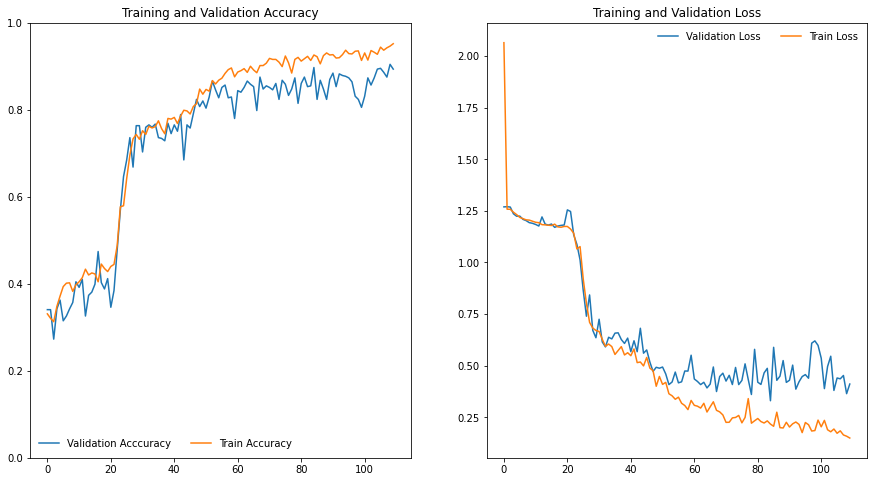

In [86]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.plot(hist.epoch, 
         hist.val_categorical_accuracy, 
         label="Validation Acccuracy")
plt.plot(hist.epoch, 
         hist.categorical_accuracy, 
         label="Train Accuracy")
plt.legend(loc='lower left',
           ncol=2,
           frameon=False)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, 
         hist.val_loss, 
         label="Validation Loss")
plt.plot(hist.epoch, 
         hist.loss, 
         label="Train Loss")
plt.legend(loc='upper right',
           ncol=2,
           frameon=False)
plt.title('Training and Validation Loss')
plt.show()

In [60]:
label_array = labels.columns[1::]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


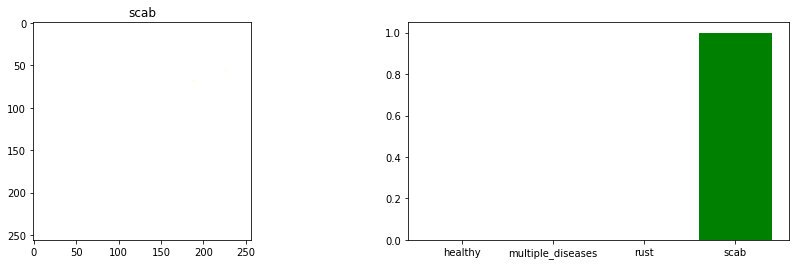

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


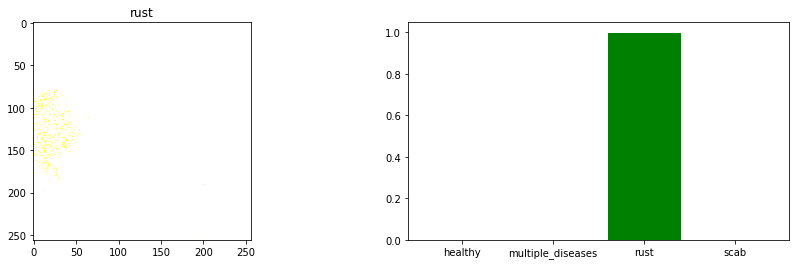

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


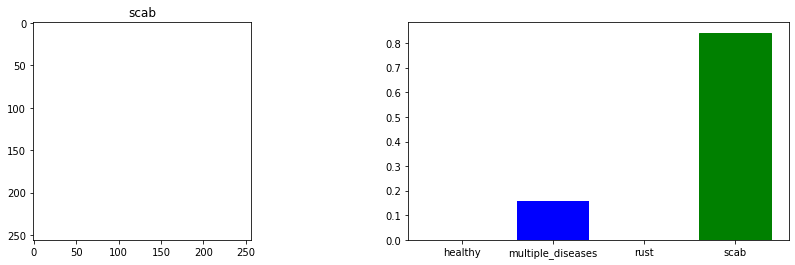

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


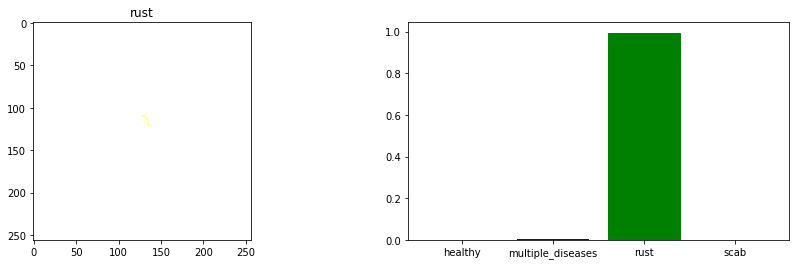

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


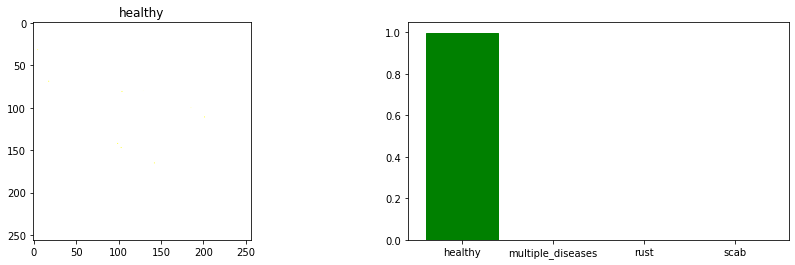

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


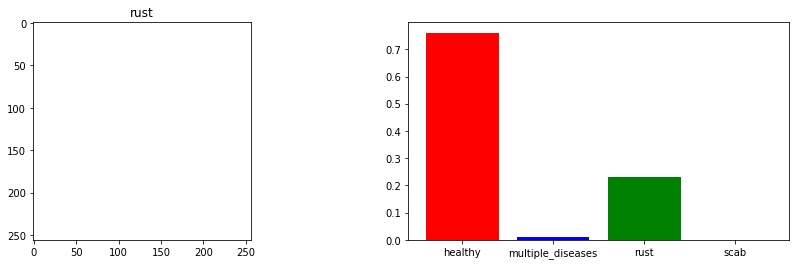

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


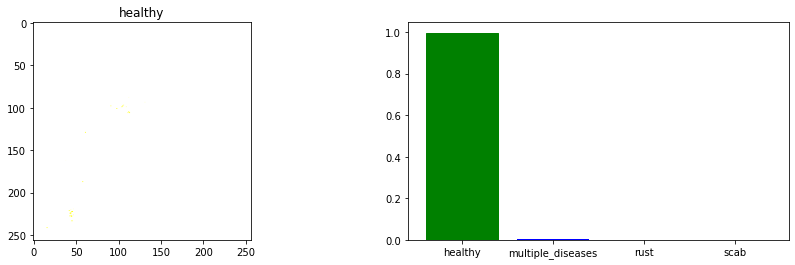

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


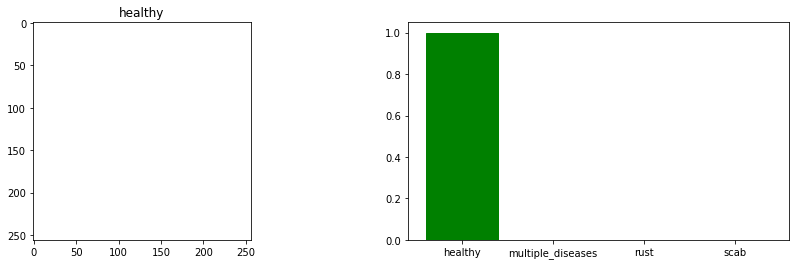

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


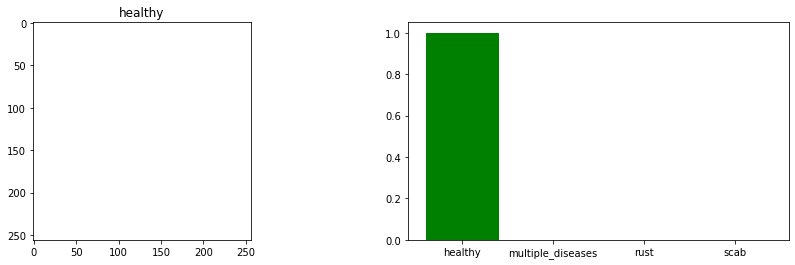

In [61]:
label_array = labels.columns[1::]
# plot_imgs = val_images.copy()
tru_labels = y_test.values
counter = 0
for i, label in val_ds:
    if counter <= 9:
        # index = np.random.randint(low=0, high=len(plot_imgs), size=1)
        # img_predicted_on = plot_imgs[index][0]
        # full_img_path = test_df.path.values[index]
        # full_img_path = full_img_path[0].split('.')[0] + '.jpg'
        # img = cv2.imread(full_img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pred_array = model.predict(i)
        pred_class = label_array[np.argmax(pred_array[0])]
        
        tru_class = label_array[np.argmax(label)]
    #     if tru_class in ['healthy','rust']:
    #         continue
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
        if pred_class == tru_class:
            pred_color = 'g'
            tru_color = 'g'
        else:
            pred_color = 'r'
            tru_color = 'g'
            
        ax[0].imshow(i[0])
        ax[0].set_title('{}'.format(tru_class))
        bar = ax[1].bar(label_array, pred_array[0], color='b')
        bar[np.argmax(pred_array[0])].set_color(pred_color)
        bar[np.argmax(label)].set_color(tru_color)
        counter += 1
        plt.show()
    else:
      break

# counter = 0
# for i, label in valGen_:
#   if counter <= 9:
#     print(i[0].shape)
#     counter +=1 
#   else:
#     break

In [62]:
# import seaborn as sns
# confustion = tf.math.confusion_matrix(tru_labels, predictions, num_classes=4)
# plt.figure(figsize=(15,15))
# sns.heatmap(confusion, annot=True)

In [63]:
model.save('saved_model/newestModel_local')

INFO:tensorflow:Assets written to: saved_model/newestModel_local/assets


In [64]:
!cp -r saved_model/newestModel_local/ "/content/drive/My Drive/ppk/saved_model/newestModel_local"

In [ ]:
%ls

# Test model on new data

In [ ]:
test_df = pd.read_csv('test.csv')
test_df['path'] = test_df.image_id.progress_apply(create_paths)
test_df.path.values[:5]

In [ ]:
for i,d in enumerate(test_df.path.values[:25]):
    img = cv2.imread(d)
    # img = cv2.resize(img, (512,512))
    # img = img / 255
    # img = channel_norm(img).astype('float32') 
    # img = np.array(img)
    # img[:,:,0] -= blue_mean 
    # img[:,:,1] -= green_mean 
    # img[:,:,2] -= red_mean 
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pred = np.expand_dims(img, 0)
    pred = model.predict(img_pred)
    pred = label_array[np.argmax(pred)]
    if pred == 'rust':
        continue
    plt.imshow(img)
    plt.show()

    print('='*25,pred,'='*25)
    full_im = cv2.imread(d)
    full_im = cv2.cvtColor(full_im, cv2.COLOR_BGR2RGB)
    plt.imshow(full_im)
    plt.show()



# STARTING ANOTHER MODEL FROM HERE, Transfer learning from above model to one with more augemnted and larger images

In [ ]:
# prior = tf.keras.models.load_model('saved_model/newestModel_local')
# prior.summary()
# for layer in prior.layers:
#     print(layer)

In [ ]:
# batch = 32

# imgH = 320
# imgW = 512

# image_generator_ = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
#                                                                     rotation_range=90, 
#                                                                     width_shift_range=0.05,
#                                                                     height_shift_range=0.05, 
#                                                                     horizontal_flip=True, 
#                                                                     vertical_flip=True,
#                                                                     zoom_range=0.05,
#                                                                     featurewise_center=True, 
#                                                                     preprocessing_function=random_blurr)

# val_image_gen_ = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
#                                                                   featurewise_center=True)

# image_generator_.mean = [red_mean, blue_mean, green_mean]

# val_image_gen_.mean = [red_mean, blue_mean, green_mean]

# valGen_ = val_image_gen_.flow_from_dataframe(test_df,
#                                              directory=None, 
#                                              x_col='path',
#                                              y_col=['healthy','multiple_diseases','rust','scab'],
#                                              batch_size=batch, 
#                                              class_mode='raw', 
#                                              target_size=(imgH,imgW))

# traindataGen_ = image_generator_.flow_from_dataframe(train_df, 
#                                                      directory=None, 
#                                                      x_col='path', 
#                                                      y_col=['healthy','multiple_diseases','rust','scab'],
#                                                      target_size=(imgH,imgW), 
#                                                      batch_size=batch, 
#                                                      class_mode='raw')

In [ ]:
# def create_new_model():
#   model = tf.keras.models.Sequential([
                                      
#         tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
                                        
#         tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),

#         tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),

#         # tf.keras.layers.experimental.preprocessing.RandomContrast(0.1, seed=1234),

#         tf.keras.layers.experimental.preprocessing.RandomTranslation(0.25, 
#                                                                       0.25, 
#                                                                       fill_mode='wrap', 
#                                                                       interpolation='bilinear', 
#                                                                       seed=1234),


#         tf.keras.layers.Conv2D(filters=32,
#                                 kernel_size=(3,3), 
#                                 activation='relu', 
#                                 input_shape=(imgH, imgW, 3), 
#                                 padding='valid',
#                                 data_format='channels_last', 
#                                 name='Conv_New'),

#         tf.keras.layers.MaxPool2D(name='NewPool'),

#         tf.keras.layers.Dropout(0.15, 
#                                 name='NewDrop')
#   ])

#   for layer in prior.layers[5:-2]:
#     model.add(layer)

#   model.add(

#           tf.keras.layers.Dense(512,
#                                 activation='relu')
#   )

#   model.add(

#           tf.keras.layers.Dropout(0.15, 
#                                   name='Dropout_new')
#   )

#   model.add(

#           tf.keras.layers.Dense(4,
#                                 activation='softmax')
#   )
#   return model

In [ ]:
# with tf.device('/device:GPU:0'):
#   model_final = create_new_model()
#   model_final.build(input_shape=(None, imgH, imgW, 3))
#   model_final.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['categorical_accuracy'])

# model_final.summary()

In [ ]:
# want to initialize the weights with pre-trained layers - want them to still train though, not using this one 
# for layer in model3.layers[3:-3]:
#     layer.trainable = False

# for layer in model3.layers:
#     print(layer)
#     print(layer.trainable)

In [ ]:
# history_final = model_final.fit(train_ds,
#                                 epochs=EPOCHS,
#                                 validation_data=val_ds,
#                                 validation_batch_size=BATCH_SIZE, 
#                                 shuffle=True, 
#                                 max_queue_size=10, 
#                                 workers=2, 
#                                 use_multiprocessing=True, 
#                                 verbose=1,
#                                 callbacks=[stop])

In [ ]:
# hist_final = pd.DataFrame(history_final.history)
# hist_final['epoch'] = history_final.epoch

In [ ]:
# plt.figure(figsize=(15, 8))
# plt.subplot(1, 2, 1)
# plt.ylim(0, 1)
# plt.plot(hist_final.epoch, 
#          hist_final.val_categorical_accuracy, 
#          label="Validation Acccuracy")
# plt.plot(hist_final.epoch, 
#          hist_final.categorical_accuracy, 
#          label="Train Accuracy")
# plt.legend(loc='upper left',
#            ncol=2,
#            frameon=False)
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(hist_final.epoch, 
#          hist_final.val_loss, 
#          label="Validation Loss")
# plt.plot(hist_final.epoch, 
#          hist_final.loss, 
#          label="Train Loss")
# plt.legend(loc='upper left',
#            ncol=2,
#            frameon=False)
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# label_array = labels.columns[1::]
# # plot_imgs = val_images.copy()
# tru_labels = y_test.values
# counter = 0
# for i, label in val_ds:
#     if counter <= 9:
#         # index = np.random.randint(low=0, high=len(plot_imgs), size=1)
#         # img_predicted_on = plot_imgs[index][0]
#         # full_img_path = test_df.path.values[index]
#         # full_img_path = full_img_path[0].split('.')[0] + '.jpg'
#         # img = cv2.imread(full_img_path)
#         # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = np.expand_dims(i[0], axis=0)
#         pred_array = model_final.predict(img)
#         print(pred_array)
#         pred_class = label_array[np.argmax(pred_array)]
        
#         tru_class = label_array[np.argmax(label[0])]
#     #     if tru_class in ['healthy','rust']:
#     #         continue
#         f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
#         if pred_class == tru_class:
#             pred_color = 'g'
#             tru_color = 'g'
#         else:
#             pred_color = 'r'
#             tru_color = 'g'
            
#         ax[0].imshow(i[0])
#         ax[0].set_title('{}'.format(tru_class))
#         bar = ax[1].bar(label_array, pred_array[0], color='b')
#         bar[np.argmax(pred_array[0])].set_color(pred_color)
#         bar[np.argmax(label)].set_color(tru_color)
#         counter += 1
#         # plt.show()

#         plt.show()
#     else:
#       break

# # counter = 0
# # for i, label in valGen_:
# #   if counter <= 9:
# #     print(i[0].shape)
# #     counter +=1 
# #   else:
# #     break

In [ ]:
# model_final.save('saved_model/final')

In [ ]:
# !cp -r saved_model/final "/content/drive/My Drive/ppk/saved_model/"